In [1]:
# lu functions
import scipy
# numpy matrix operations
import numpy as np
# dataframes
import pandas as pd
# deep copy
import copy
# plotting
import matplotlib.pyplot as plt

# format the pandas dataframe
pd.options.display.float_format = '{:.3e}'.format

# LU factorization

The $ A = LU $ is a product of a lower-triangular matrix $ L $ and an uppertriangular matrix $ U $. Naturally, this is called an LU factorization of A.
Observe that $ U $ is the end product of Gaussian elimination and has the
pivots on its diagonal, while $ L $ has 1’s on its diagonal. Moreover, $ L $ has the
remarkable property that below its diagonal, each entry 'ij is precisely the
multiplier used in the elimination to annihilate the (i, j)-position

## Table of contents

1. [Implementation](#1-Implementation)
2. [Comparison with library function](#2-Comparison-with-library-function)
3. [Visualization](#3-Visualization)

## 1. Implementation

In [2]:
def lu_decomposition(A):                    # in-situ operation
    n = len(A)
    for i in range(n):                       
        leading = A[i][i]                    
        if leading != 0:                     
            for j in range(i+1, n):         
                divider = A[j][i] / leading 
                A[j][i:] -= divider * A[i][i:]
                A[j][i] = divider
    return A                            

In [3]:
def separate_lu(A):
    n = len(A)
    U = np.zeros((n, n))
    L = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i <= j:
                U[i][j] = A[i][j]
            if i == j:
                L[i][j] = 1
            elif i > j:
                L[i][j] = A[i][j]
    return L, U

## 2. Comparison with library function

Error will be counted by comparing the difference between product of $ L $ and $ U $ with the original matrix $ A $ with a tolerance of $ 10^{-5} $. 

$$ || A - L @ U || $$

```numpy.linalg.norm``` used for comparison is the Frobenius norm which is defined as:

$$ || A ||_F = \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n} |a_{ij}|^2} $$

where $ a_{ij} $ is the element of matrix $ A $ at row $ i $ and column $ j $.

Compared function is: ```scipy.linalg.lu```.

In [4]:
def random_matrix(n):
    return np.random.uniform(-10e5, 10e5, size=(n, n))

def count_error(func, A, islib=True):
    copy_A = copy.deepcopy(A)
    copy_A2 = copy.deepcopy(A)
    if islib:
        L, U = func(copy_A, permute_l=True)
    else:
        L, U = separate_lu(func(copy_A))
    return np.linalg.norm(np.add(copy_A2, -np.matmul(L, U)))

def compare_error():
    data = {"n": [], "lu_decomposition": [], "scipy.linalg.lu": []}
    for n in [100*i for i in range(1, 11)]:
        lu_error = 0
        scipy_error = 0

        for _ in range(3):
            A = random_matrix(n)
            scipy_error += count_error(scipy.linalg.lu, A)
            lu_error += count_error(lu_decomposition, A, islib=False)
            

        data["n"].append(n)
        data["lu_decomposition"].append(lu_error/3)
        data["scipy.linalg.lu"].append(scipy_error/3)
    df = pd.DataFrame(data)
    df.columns = pd.MultiIndex.from_product([['Error of LU decomposition'], df.columns])
    return df

In [5]:
results = compare_error()
display(results)

Error of LU decomposition                                 
                          n lu_decomposition scipy.linalg.lu
0                       100        8.100e-06       4.196e-08
1                       200        1.057e-04       1.542e-07
2                       300        4.772e-05       3.328e-07
3                       400        1.103e-04       5.674e-07
4                       500        2.086e-04       8.947e-07
5                       600        9.888e-04       1.281e-06
6                       700        2.413e-04       1.719e-06
7                       800        4.489e-04       2.236e-06
8                       900        4.982e-03       2.854e-06
9                      1000        5.492e-03       3.372e-06

## Visualization

In [8]:
def plot(data):
    def setup_axis(axis, title):
        axis.plot(data[suptitle]["n"], data[suptitle][title])
        axis.set_title(title)
        axis.set_xlabel("n")
        axis.set_ylabel("Error")
        axis.grid()
        max_value = data.loc[:, data.columns[1:]].max().max()
        axis.set_ylim(0, max_value)

    fig, axis = plt.subplots(1, 2, figsize=(10, 5))
    suptitle = data.columns[0][0]
    fig.suptitle(suptitle)
    columns = [col for _, col in data.columns[1:]]
    for i, col in enumerate(columns):
        setup_axis(axis[i], col)
    
    plt.show()

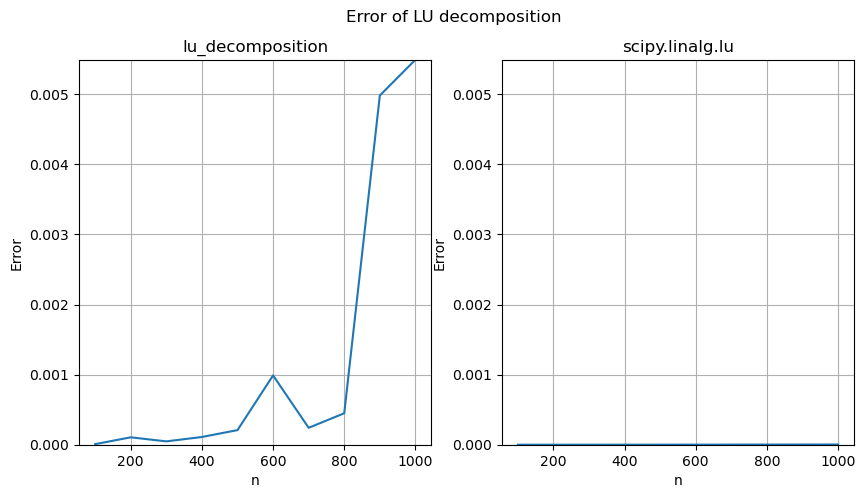

In [9]:
plot(results)

Function ```lu_decomposition``` was implemented correctly.

In the visualization, we can see that the library function have more accurate results than the implemented function, but both errors are very small.

The implemented function has a small error in the 3rd decimal place, while the library function has a small error in the 5th decimal place.

To reduce the error, we could use a more accurate method, like partial pivoting, to find the multipliers and the upper triangular matrix.

-----------------------------------------------------------------------------------------